# Setup

In [77]:
import numpy as np
import os
import sys
import tensorflow as tf

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


# OpenAI gym – Pacman

In [78]:
import gym

In [79]:
env = gym.make("MsPacman-v0")

In [80]:
obs = env.reset()

In [81]:
obs.shape

(210, 160, 3)

In [82]:
img = env.render(mode="rgb_array")

In [83]:
img.shape

(210, 160, 3)

<IPython.core.display.Javascript object>


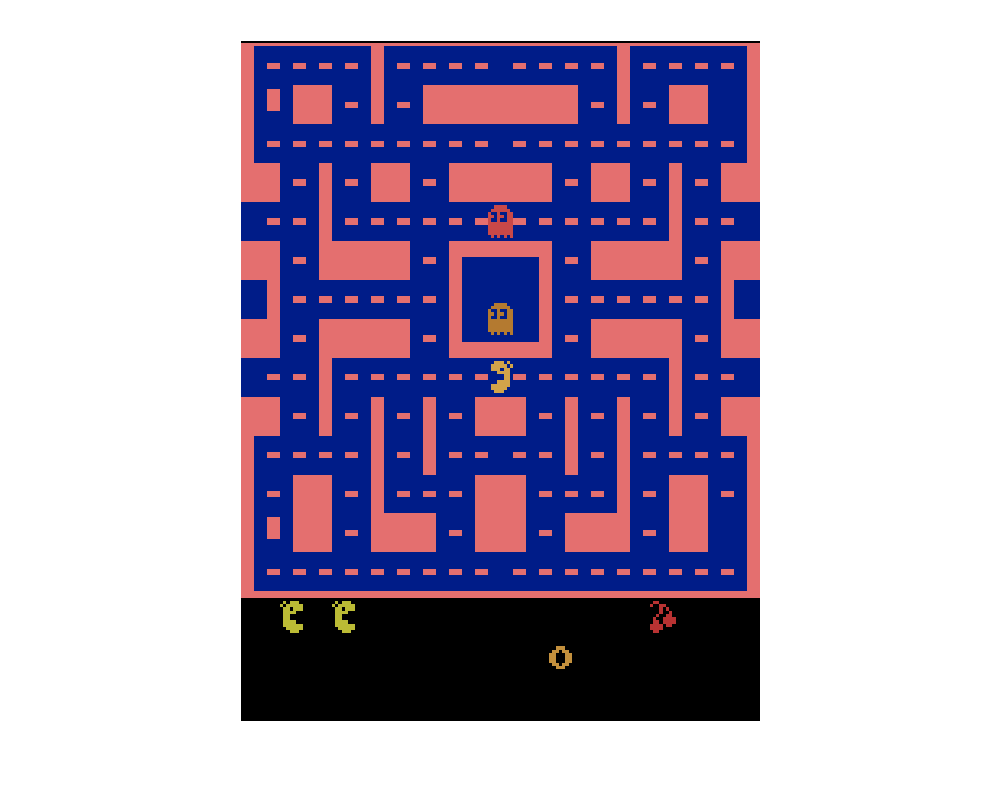

Saving figure MsPacman


In [84]:
plt.figure(figsize=(5,4))
plt.imshow(img)
plt.axis("off")
save_fig("MsPacman")
plt.show()

In [44]:
(img == obs).all()

True

In [85]:
def plot_environment(env, figsize=(5,4)):
    plt.close()
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [86]:
env.action_space

Discrete(9)

In [87]:
env.reset()
for step in range(110):
    env.step(3) # left
for step in range(41):
    env.step(8) # lower-left

<IPython.core.display.Javascript object>


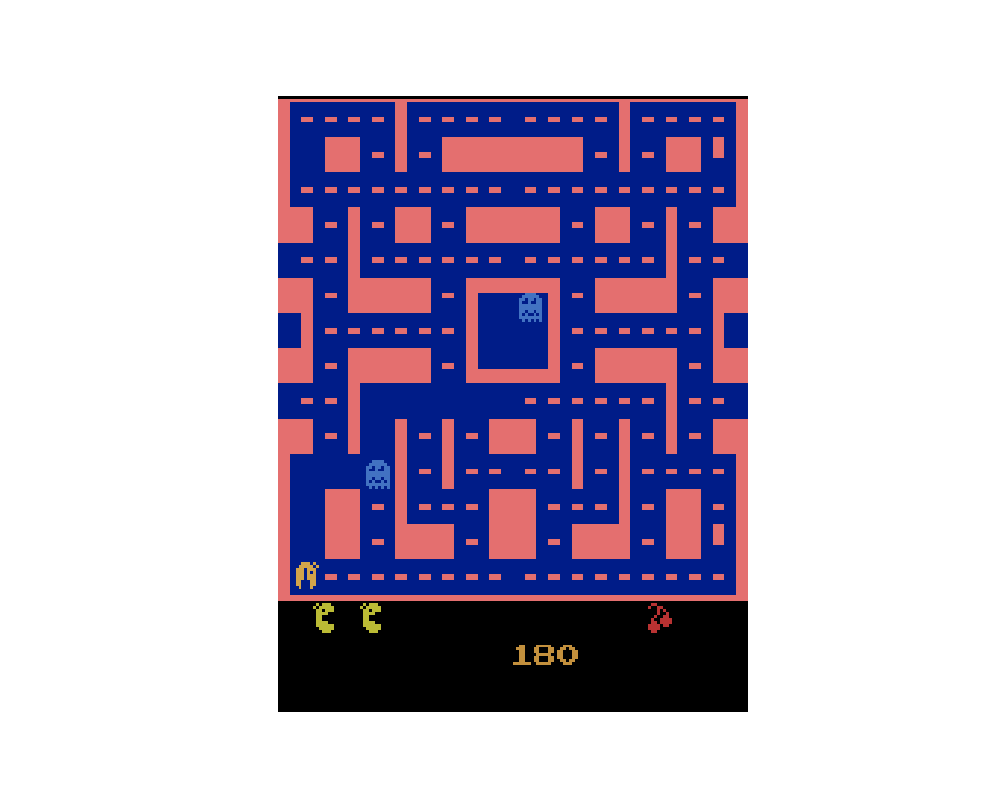

In [88]:
plot_environment(env)

In [49]:
obs, reward, done, info = env.step(0)

In [89]:
obs.shape

(210, 160, 3)

In [90]:
reward

1.0

In [91]:
done

True

In [92]:
info

{}

In [93]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step%n_change_steps==0:
        action = env.action_space.sample() # play randomly
    obs, reward, done, info = env.step(action)
    if done:
        break

In [94]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    plt.close()
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, 
                                   update_scene, 
                                   fargs=(frames, patch), 
                                   frames=len(frames), 
                                   repeat=repeat, 
                                   interval=interval)

<IPython.core.display.Javascript object>


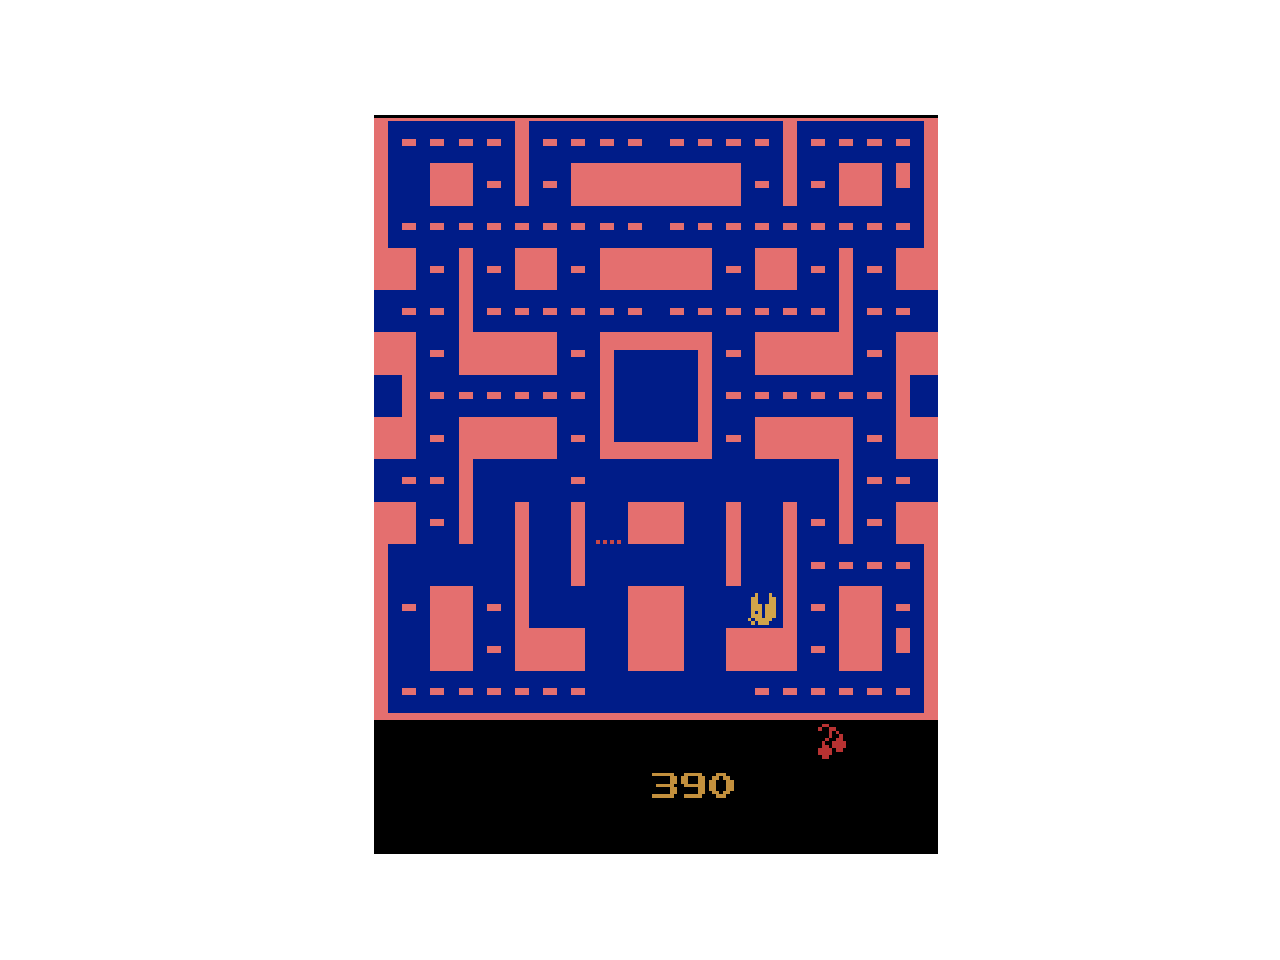

In [95]:
video = plot_animation(frames)
plt.show();

In [58]:
env.close()

# Cart-Pole

In [59]:
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [60]:
obs = env.reset()

In [61]:
obs

array([-0.0217773 ,  0.04068407,  0.00092397, -0.01896412])

In [63]:
obs.shape

(4,)

In [64]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # render the cart pole environment manually
        img_w = 600
        img_h = 400
        cart_w = img_w//12
        cart_h = img_h//15
        pole_len = img_h//3.5
        pole_w = img_w//80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000
        pole_col = 0x669acc
        
        pos, vel, ang, ang_vel = obs
        img = Image.new("RGB", (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos*img_w//x_width + img_w//x_width
        cart_y = img_h*95//100
        top_pole_x = cart_x + pole_len*np.sin(ang)
        top_pole_y = cart_y - cart_h//2 - pole_len*np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x-cart_w//2, cart_y-cart_h//2, cart_x+cart_w//2, cart_y+cart_h//2), fill=cart_col)
        draw.line((cart_x, cart_y-cart_h//2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w)
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


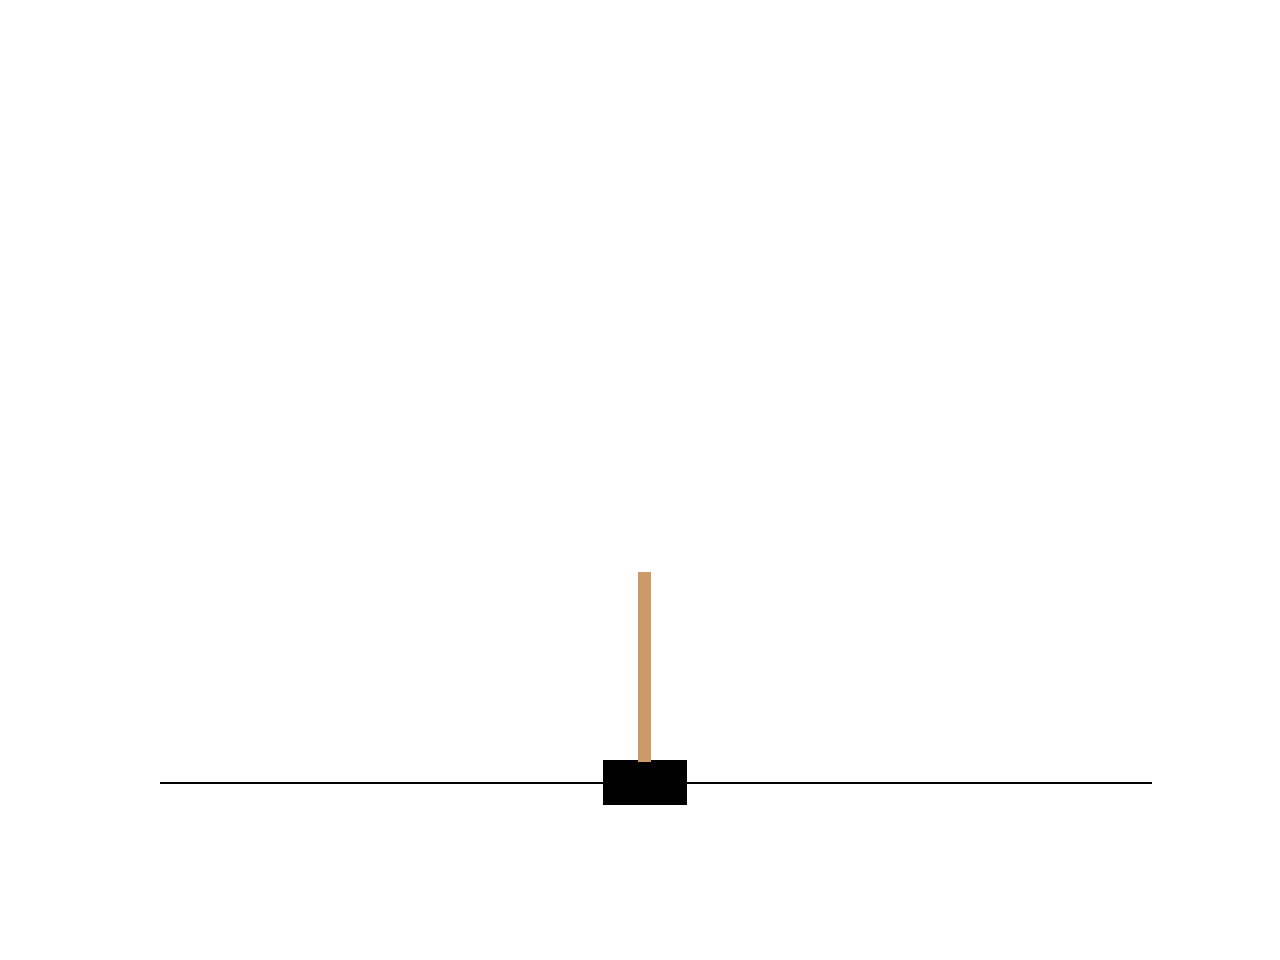

In [65]:
plot_cart_pole(env, obs)

In [66]:
env.action_space

Discrete(2)

In [70]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

<IPython.core.display.Javascript object>


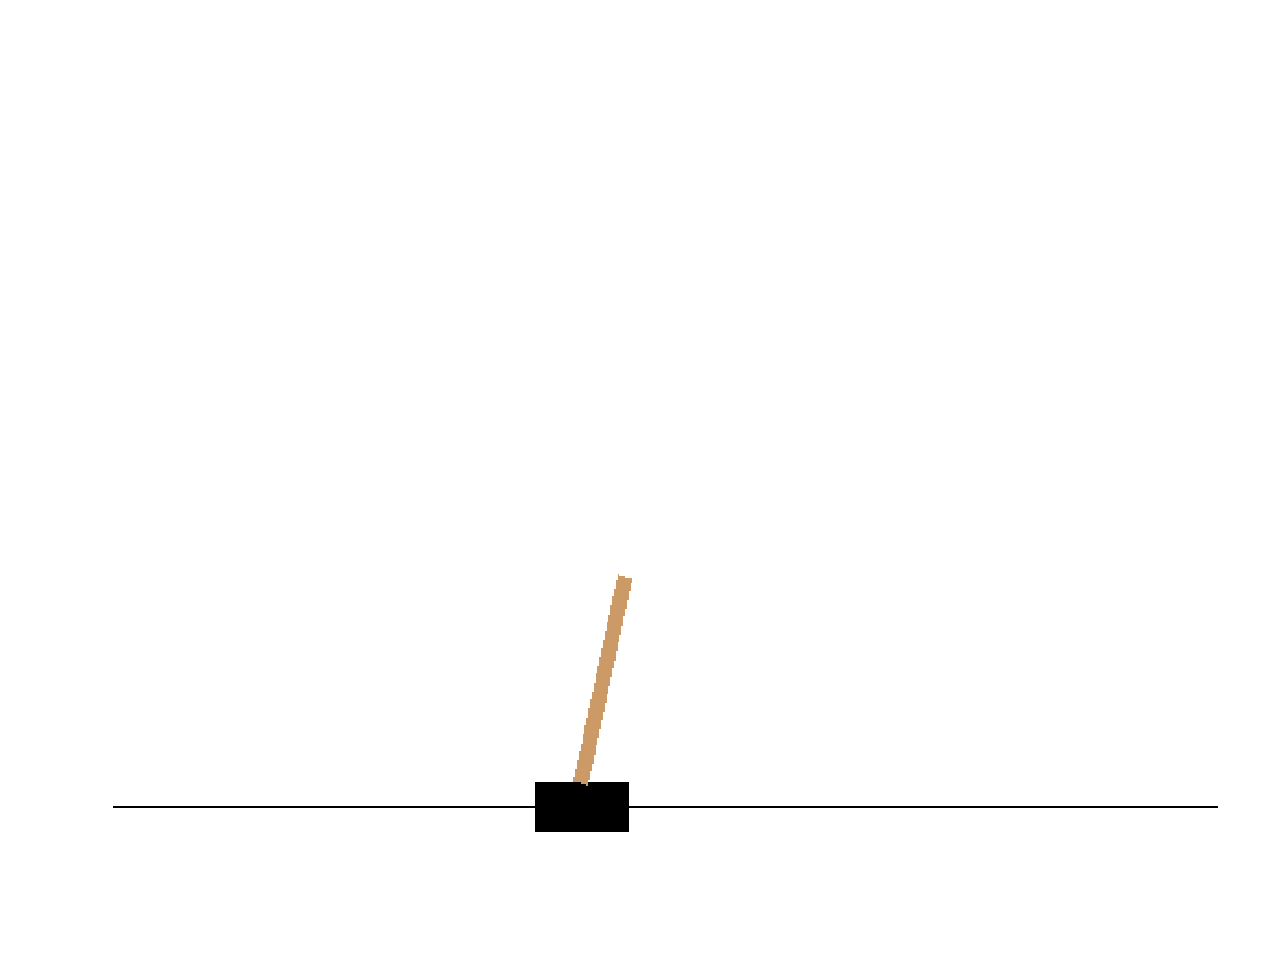

Saving figure cart_pole_plot


In [71]:
plt.close()
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")
save_fig("cart_pole_plot");

In [69]:
img.shape

(400, 600, 3)

In [72]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break

<IPython.core.display.Javascript object>


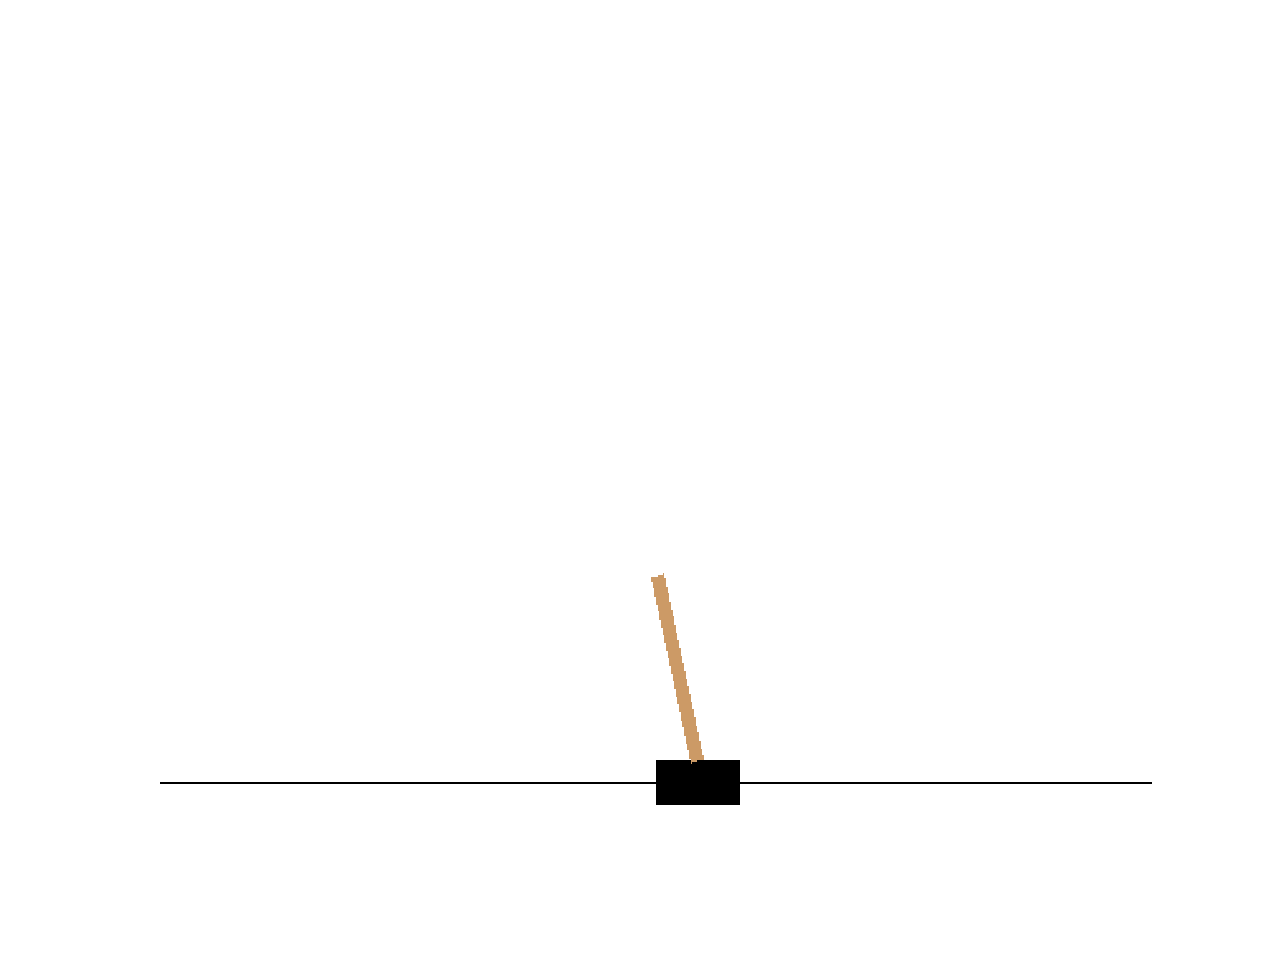

In [73]:
plot_cart_pole(env, obs)

# A hard-coded Policy

In [74]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)
    
    # hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle<0:
        action = 0
    else:
        action = 1
        
    obs, reward, done, info = env.step(action)
    if done:
        break

<IPython.core.display.Javascript object>


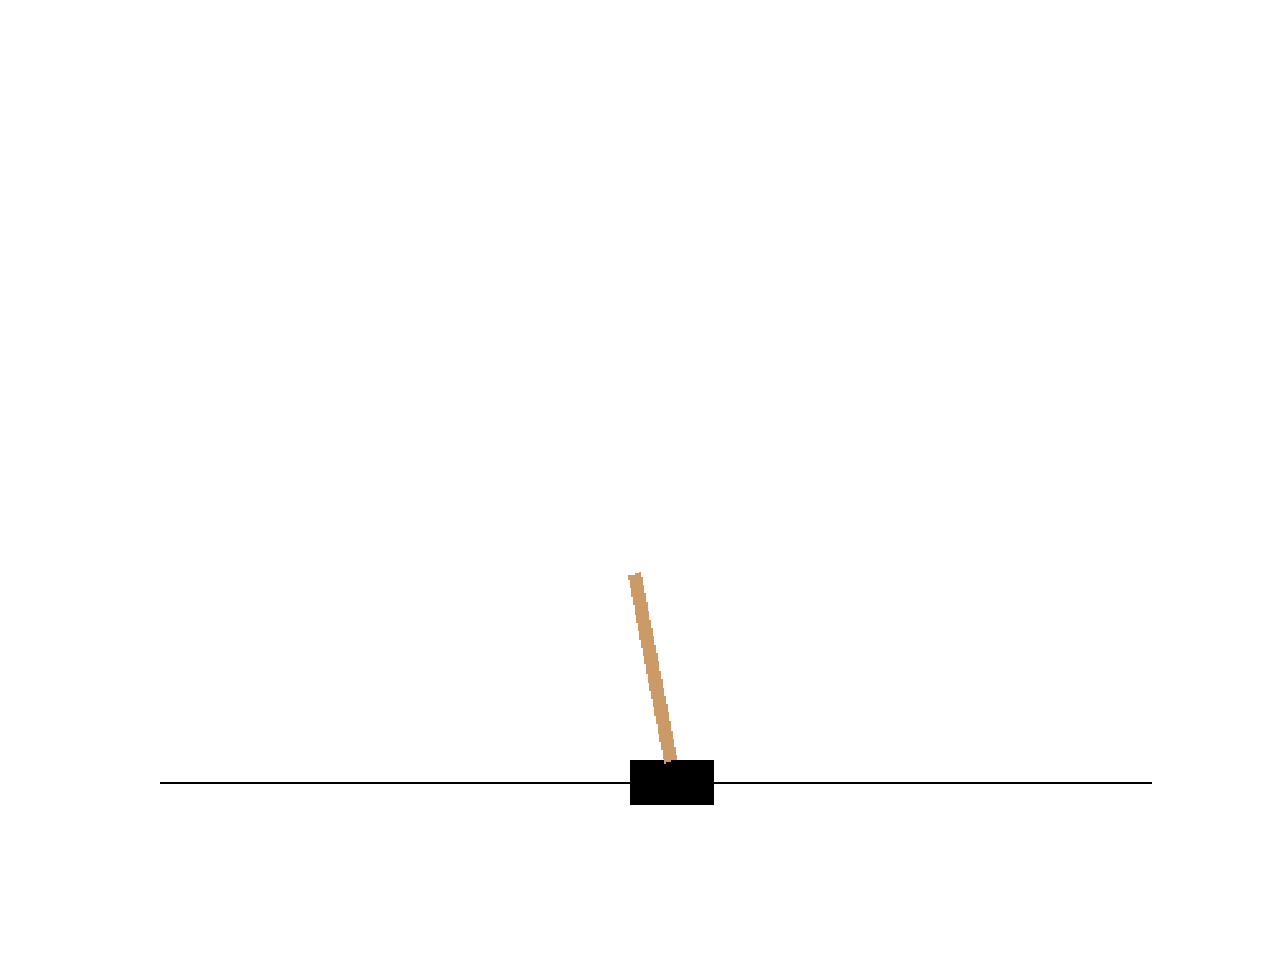

In [75]:
video = plot_animation(frames)
plt.show();

# Neural Network Policies